# Analisi della distribuzione della popolazione residente in Italia

Usiamo i dati dell'ISTAT per costruire la distribuzione dell'età della popolazione italiana.

I dati vanno scaricati dalla [pagina dell'ISTAT](http://dati.istat.it/Index.aspx?DataSetCode=DCIS_POPRES1) con l'opzione "Esporta > Formato di testo (CSV)".

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [4]:
df = pd.read_csv('data/DCIS_POPRES1_19012021083339190.csv')

Notare che la codifica dell'età è fatta con una stringa. Questo tipo di codifica è abbastanza comune nei dati che si trovano in rete. La stringa va innanzitutto convertita in un valore numerico che può essere utilizzato.

In [5]:
df

,ITTER107,Territorio,TIPO_DATO15,Tipo di indicatore demografico,SEXISTAT1,Sesso,ETA1,Età,STATCIV2,Stato civile,TIME,Seleziona periodo,Value,Flag Codes,Flags
0,IT,Italia,JAN,popolazione al 1º gennaio,1,maschi,Y0,0 anni,1,nubile/celibe,2020,2020,212756,NaN,NaN
1,IT,Italia,JAN,popolazione al 1º gennaio,1,maschi,Y0,0 anni,99,totale,2020,2020,212756,NaN,NaN
2,IT,Italia,JAN,popolazione al 1º gennaio,2,femmine,Y0,0 anni,1,nubile/celibe,2020,2020,202218,NaN,NaN
3,IT,Italia,JAN,popolazione al 1º gennaio,2,femmine,Y0,0 anni,99,totale,2020,2020,202218,NaN,NaN
4,IT,Italia,JAN,popolazione al 1º gennaio,9,totale,Y0,0 anni,1,nubile/celibe,2020,2020,414974,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
289165,ITG28,Oristano,JAN,popolazione al 1º gennaio,9,totale,Y_GE100,100 anni e più,16,già in unione civile (per decesso del partner),2020,2020,0,NaN,NaN
289166,ITG28,Oristano,JAN,popolazione al 1º gennaio,9,totale,Y_GE100,100 anni e più,17,già in unione civile (per scioglimento unione),2020,2020,0,NaN,NaN
289167,ITG28,Oristano,JAN,popolazione al 1º gennaio,9,totale,TOTAL,totale,15,unito/a civilmente,2020,2020,9,NaN,NaN
289168,ITG28,Oristano,JAN,popolazione al 1º gennaio,9,totale,TOTAL,totale,16,già in unione civile (per decesso del partner),2020,2020,0,NaN,NaN


In [4]:
df.ETA1.unique()

array(['Y0', 'Y1', 'Y2', 'Y3', 'Y4', 'Y5', 'Y6', 'Y7', 'Y8', 'Y9', 'Y10',
       'Y11', 'Y12', 'Y13', 'Y14', 'Y15', 'Y16', 'Y17', 'Y18', 'Y19',
       'Y20', 'Y21', 'Y22', 'Y23', 'Y24', 'Y25', 'Y26', 'Y27', 'Y28',
       'Y29', 'Y30', 'Y31', 'Y32', 'Y33', 'Y34', 'Y35', 'Y36', 'Y37',
       'Y38', 'Y39', 'Y40', 'Y41', 'Y42', 'Y43', 'Y44', 'Y45', 'Y46',
       'Y47', 'Y48', 'Y49', 'Y50', 'Y51', 'Y52', 'Y53', 'Y54', 'Y55',
       'Y56', 'Y57', 'Y58', 'Y59', 'Y60', 'Y61', 'Y62', 'Y63', 'Y64',
       'Y65', 'Y66', 'Y67', 'Y68', 'Y69', 'Y70', 'Y71', 'Y72', 'Y73',
       'Y74', 'Y75', 'Y76', 'Y77', 'Y78', 'Y79', 'Y80', 'Y81', 'Y82',
       'Y83', 'Y84', 'Y85', 'Y86', 'Y87', 'Y88', 'Y89', 'Y90', 'Y91',
       'Y92', 'Y93', 'Y94', 'Y95', 'Y96', 'Y97', 'Y98', 'Y99', 'Y_GE100',
       'TOTAL'], dtype=object)

I dati sono organizzati per aree territoriali. Quindi è possibile avere distribuzioni per aree geografiche.

In [5]:
sorted(df.Territorio.unique())

['Abruzzo',
 'Agrigento',
 'Alessandria',
 'Ancona',
 'Arezzo',
 'Ascoli Piceno',
 'Asti',
 'Avellino',
 'Bari',
 'Barletta-Andria-Trani',
 'Basilicata',
 'Belluno',
 'Benevento',
 'Bergamo',
 'Biella',
 'Bologna',
 'Bolzano / Bozen',
 'Brescia',
 'Brindisi',
 'Cagliari',
 'Calabria',
 'Caltanissetta',
 'Campania',
 'Campobasso',
 'Caserta',
 'Catania',
 'Catanzaro',
 'Centro',
 'Chieti',
 'Como',
 'Cosenza',
 'Cremona',
 'Crotone',
 'Cuneo',
 'Emilia-Romagna',
 'Enna',
 'Fermo',
 'Ferrara',
 'Firenze',
 'Foggia',
 'Forlì-Cesena',
 'Friuli-Venezia Giulia',
 'Frosinone',
 'Genova',
 'Gorizia',
 'Grosseto',
 'Imperia',
 'Isernia',
 'Isole',
 'Italia',
 "L'Aquila",
 'La Spezia',
 'Latina',
 'Lazio',
 'Lecce',
 'Lecco',
 'Liguria',
 'Livorno',
 'Lodi',
 'Lombardia',
 'Lucca',
 'Macerata',
 'Mantova',
 'Marche',
 'Massa-Carrara',
 'Matera',
 'Messina',
 'Milano',
 'Modena',
 'Molise',
 'Monza e della Brianza',
 'Napoli',
 'Nord-est',
 'Nord-ovest',
 'Novara',
 'Nuoro',
 'Oristano',
 'Padova

In [9]:
df['anni'] = pd.to_numeric(df.ETA1.str.replace('Y','').str.replace('_GE', ''), errors='coerce')
df = df.sort_values(by=['anni'])

In [12]:
df = df[(df.Territorio=='Italia') & (df.Sesso=='totale') & (df['Stato civile']=='totale') & (~ df.anni.isnull())]

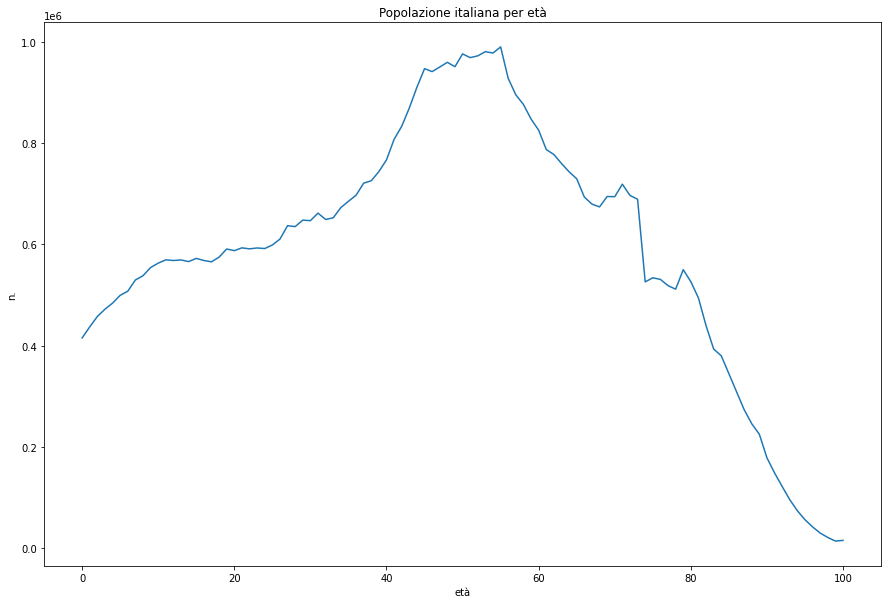

In [13]:
plt.figure(figsize=(15,10))
plt.plot(df['anni'],df['Value'],linestyle='-')
plt.title('Popolazione italiana per età')
plt.xlabel('età')
plt.ylabel('n.')
plt.show()

In [12]:
df['Value_cum'] = df.Value.cumsum()
df['Value_perc'] = df.Value_cum/df.Value_cum.max()

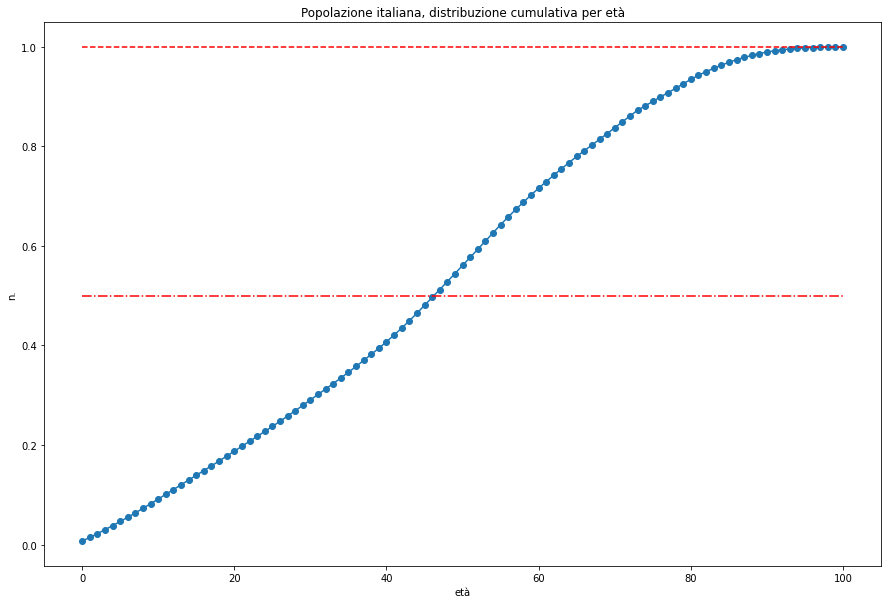

In [14]:
plt.figure(figsize=(15,10))
plt.plot(df['anni'],df['Value_perc'], 'o', linestyle='-')
plt.plot((0, 100),(1,1), color='red', linestyle='--')
plt.plot((0, 100),(.5,.5), color='red', linestyle='-.')
plt.title('Popolazione italiana, distribuzione cumulativa per età')
plt.xlabel('età')
plt.ylabel('n.')
plt.show()

Per trasformare la distribuzione discreta in continua, usiamo la funzione [```interp1d```](https://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.interp1d.html).

Possiamo facilmente invertire la distribuzione cumulativa usando il campo ```Value_perc``` come asse $x$.

In [21]:
from scipy.interpolate import interp1d
interp_cum=interp1d(df['Value_perc'], df['anni'])
interp_val=interp1d(df['anni'], df['Value'])

La mediana è semplicemente il 50° percentile della cumulativa:

In [22]:
median=interp_cum(0.5)
print('median: ', median)

median:  46.217884360233455


La media si può calcolare come media pesata usando come pesi il numero di persone con una certa età.

In [23]:
avg=np.average(df['anni'], weights=df['Value'])
print('average: ', avg)

average:  45.23628494983224


La moda è semplicemente il valore a cui corrisponde il maggior numero di persone. Può essere calcolato solo come valore intero, visto il formato dei dati. 

In [24]:
mode=float(df.loc[df['Value'].idxmax()]['anni'])
print('mode: ', mode)

mode:  55.0


In [25]:
print('average: {:.2f}, median: {:.2f}, mode: {:.2f}'.format(avg,median,mode))

average: 45.24, median: 46.22, mode: 55.00


Possiamo riportare gli indicatodi sulla distribuzione

percentile: 10.00% 10.893830543245917
percentile: 25.00% 26.230749659987875
percentile: 75.00% 62.59456175935956
percentile: 90.00% 76.06763860432993


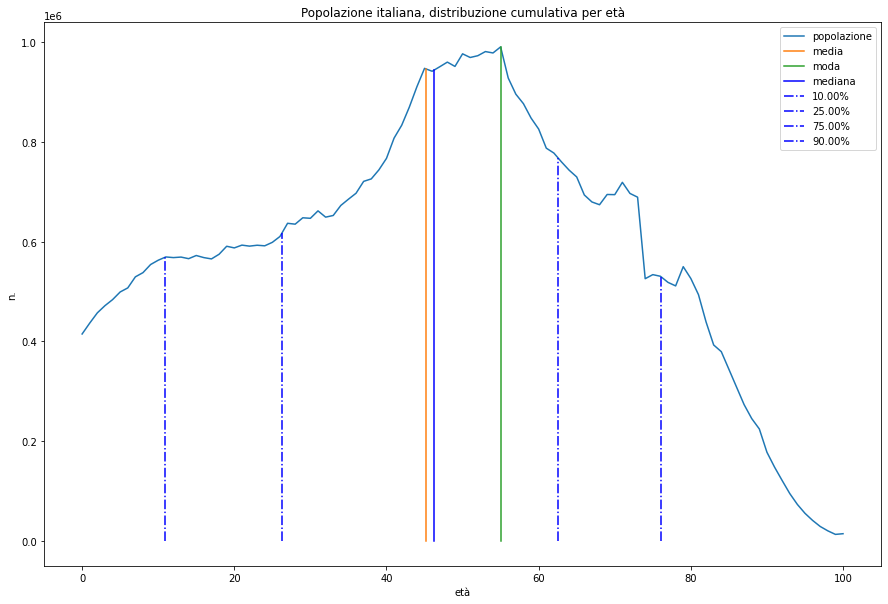

In [26]:
plt.figure(figsize=(15,10))
plt.plot(df['anni'], df['Value'],linestyle='-', label='popolazione')
plt.plot((avg,avg), (0,interp_val(avg)), linestyle='-', label='media')
plt.plot((mode,mode), (0,interp_val(mode)), linestyle='-', label='moda')
plt.plot((median,median), (0,interp_val(median)), linestyle='-', color='blue', label='mediana')
for perc in [0.1, 0.25, 0.75, 0.9]:
    val = interp_cum(perc)
    print("percentile: {:.2%}".format(perc), val)
    plt.plot((val,val), (0,interp_val(val)), linestyle='-.', color='blue', label='{:.2%}'.format(perc))
plt.legend()
plt.title('Popolazione italiana, distribuzione cumulativa per età')
plt.xlabel('età')
plt.ylabel('n.')
plt.show()

## Spunti per esercizi

* Ripetere lo stesso grafico e la valutazione dei quantili per per alcune principali regioni o province italiane.
* Confrontare sullo stesso grafico le distribuzioni di età per alcune principali regioni o province italiane.
* Confrontare per Campania e Liguria a quel età corrisponde il 5% della popolazione più anziana